<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99_010_Orbital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 해석역학
## <Elective Tracks 2024 Summer Programme>

4(5)차 Runge-Kutta 방법으로 행성의 운동을 모의실험한다.

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
#constants
Msol = 1.9891E30	           #[kg] Solar mass
m = 5.9736E24	               #[kg] Earth's mass
G = 6.673E-11                #[Ns/m] Gravitational const.

def grav(t, S):
    """
    현재 위치에서 태양의 중력에 의한 행성의 가속도를 계산하는 함수
    위치의 변화율은 현재 속도와 같고
    속도의 변화울은 중력 법칙에 따라 계산한다.
    t: 현재 시각
    S: [x, y, vx, vy] # x, y는 현재 위치 좌표, vx, vy는 속도 성분
    """
    x, y, vx, vy = S
    r = np.sqrt(x**2 + y**2)
    k = G*Msol
    ax = -k*x/r**3
    ay = -k*y/r**3
    return np.array([vx, vy, ax, ay])

In [ ]:
r0 = 1.49598261E11              # [m] 1AU
day = 24 * 60 * 60                # time step: 1 day
mult = 0.5 # 지구 공전궤도 속력에 곱해줄 계수
#v0 = mult * 29.78E3                 # [m/s] 지구 공전속력 29.78E3 m/s 의 mult배
v0 = mult * np.sqrt(G*Msol/r0)

(x, y) = (r0, 0.0)
(vx, vy) = (v0 * np.cos(np.pi/2), v0 * np.sin(np.pi/2))
u = np.array([x, y, vx, vy])
nyr = 2                     # Number of years to simulate
t0 = 0.0;
year = 365 * day # [s] 1 Earth Year
t = t0

tf = nyr * year   # nyr Earth Years
y0 = u

ts = np.linspace(t0, tf, nyr*365)
sol = solve_ivp(grav, (t0, tf), y0, t_eval=ts, max_step=day, rtol=0.001)

In [ ]:
xs, ys, vxs, vys = sol.y
inds = np.indices(ts.shape)[0]

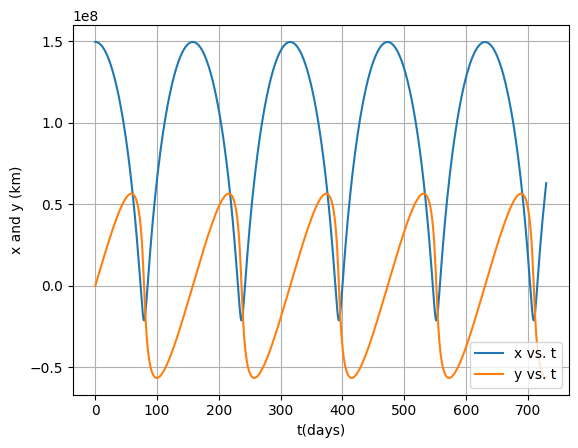

In [ ]:
km = 1000   # 단위 변환 인자(m --> km)

plt.plot(ts/day, xs/km)
plt.plot(ts/day, ys/km)
plt.legend(["x vs. t","y vs. t"])
plt.xlabel("t(days)")
plt.ylabel("x and y (km)")
plt.grid()
plt.show()

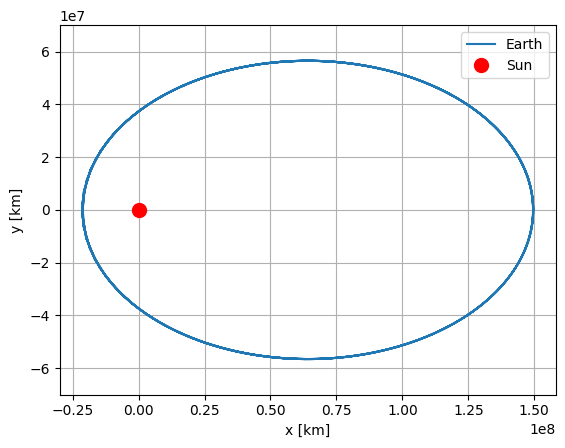

In [ ]:
plt.axis('equal')
plt.plot(xs/km, ys/km, label='Earth')
plt.plot([0],[0], 'ro', markersize=10, label='Sun')
plt.xlabel("x [km]")
plt.ylabel("y [km]")
plt.legend()
plt.grid()

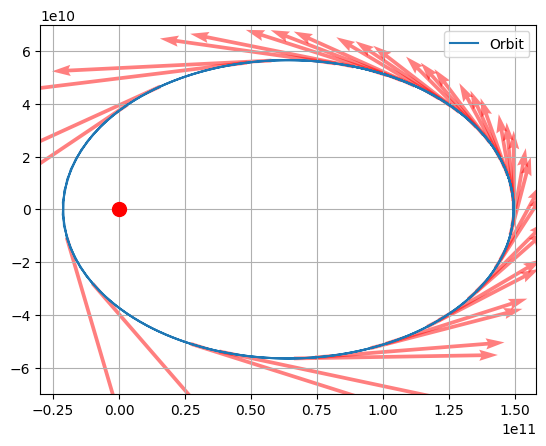

In [ ]:
plt.axis('equal')
plt.grid()
vm=2e6  # 속도 벡터 스케일
skip=10
dlim=366

plt.plot(xs[:dlim],ys[:dlim], label = "Orbit")
#plt.plot((xs+vxs*vm)[:dlim], (ys+vys*vm)[:dlim], c='orange')
plt.quiver(xs[:dlim:skip], ys[:dlim:skip], \
           vxs[:dlim:skip], vys[:dlim:skip], \
           scale_units='xy', angles='xy', scale=1/vm, \
           color='red', alpha=0.5)
plt.plot([0],[0], 'ro', markersize=10)
plt.legend()

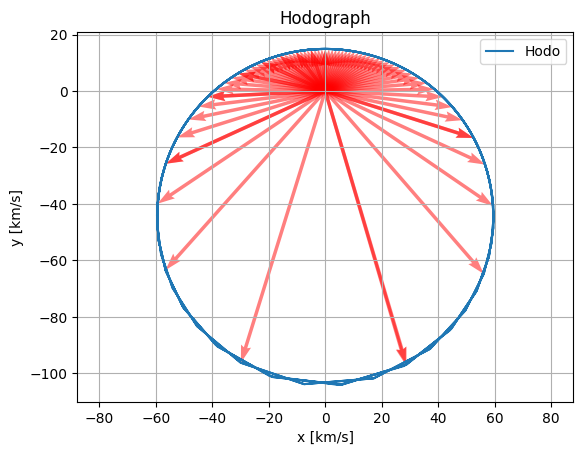

In [ ]:
O = np.zeros_like(ts)
skip=10

plt.title("Hodograph")
plt.axis('equal')
plt.xlabel("x [km/s]")
plt.ylabel("y [km/s]")
plt.plot(vxs/km, vys/km, label = "Hodo")
plt.grid()
plt.quiver(O[::skip], O[::skip], vxs[::skip]/km, vys[::skip]/km, \
           scale_units='xy', angles='xy', scale=1, \
           color='red', alpha=0.5)
plt.legend()

### 시뮬레이션 결과 파일 저장하기

In [ ]:
import pandas as pd

In [ ]:
data_list = {"t(s)":ts, "x(m)":xs, "y(m)":ys, "vx(m/s)":vxs, "vy(m/s)":vys}

In [ ]:
df = pd.DataFrame(data_list)

In [ ]:
df.to_csv(f"Earth_{mult:.1f}_vE.csv", index=False)